<a href="https://colab.research.google.com/github/JUANOSORIOG/Senales_y_Sistemas/blob/main/PARCIAL_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROGRAMACION PARCIAL #1***

# *Punto 1.*

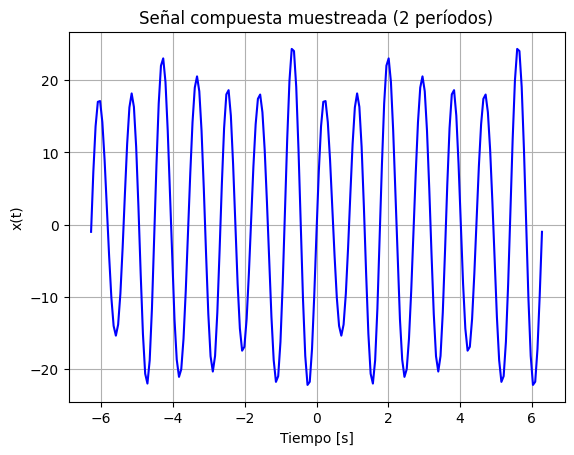

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Período fundamental de la señal compuesta
T_0 = 2*np.pi # Periodo fundamental o total

# Amplitudes
A_1 = 20
A_2 = 3
A_3 = 2

# Frecuencias angulares
w1 = 7     # rad/s
w2 = 5     # rad/s
w3 = 10    # rad/s

# Tiempo de simulación (2 períodos fundamentales)
ti = -T_0
tf = T_0

# Frecuencia de muestreo: al menos el doble de la máxima frecuencia (Nyquist)
f_max = w3 / (2 * np.pi)  # frecuencia en Hz
Fs = 10 * f_max           # muestreo 10 veces mayor para buena visualización
Ts = 1 / Fs

# Vector de tiempo
tv = np.arange(ti, tf, Ts)

# Construcción de la señal
xv = A_1 * np.sin(w1 * tv) - A_2 * np.cos(w2 * tv) + A_3 * np.cos(w3 * tv)

# Graficar señal continua
plt.plot(tv, xv, 'b')
plt.xlabel('Tiempo [s]')
plt.ylabel('x(t)')
plt.title('Señal compuesta muestreada (2 períodos)')
plt.grid(True)
plt.show()

<ipython-input-14-dfa299a15bbe>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yq[i] = my_cuantizador(ycs[i], ve)


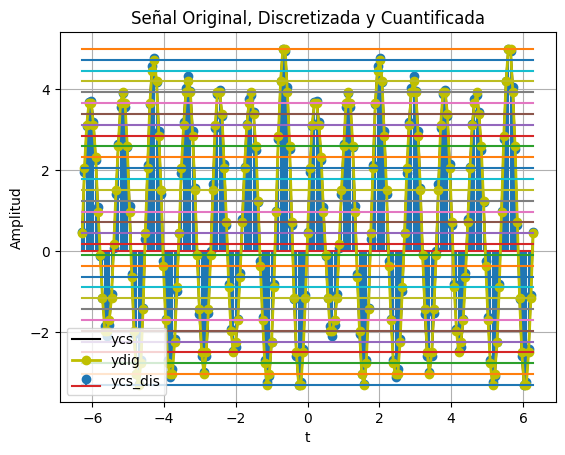

In [14]:
# Definir la función my_ceropen (cero y pendiente)
def my_ceropen(x, ymin=0, ymax=200):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin) / (xmax - xmin)
  c = ymin - m * xmin
  yv = m * x + c
  return yv

# Redefinir "y" como se definió en la parte anterior
y = 20 * np.sin(7 * tv) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

  #cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=5)


#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax
from scipy.spatial.distance import cdist


# Función de cuantización
def my_cuantizador(yn, vq):
  dn = cdist(np.array(yn).reshape(-1, 1), vq.reshape(-1, 1))
  ind = np.argmin(dn, axis=1)
  return vq[ind]

# Cuantizar la señal
yq = np.zeros_like(ycs)
for i in range(len(ycs)):
  yq[i] = my_cuantizador(ycs[i], ve)

# Graficar
plt.plot(tv, ycs, c='black', label='ycs') # Señal original
plt.stem(tv, ycs, label='ycs_dis') # Señal discretizada
plt.plot(tv, yq, c='y', marker='o', label='ydig', linewidth=2)  # Señal cuantificada
# Mostrar niveles de cuantificación
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Señal Original, Discretizada y Cuantificada')
plt.show()

# *Punto 2.*

Ω1 = 0.20 rad/muestra
Ω2 = 0.59 rad/muestra
Ω3 antes de aliasing = 3.53 rad/muestra
Ω3 después de aliasing = -2.75 rad/muestra


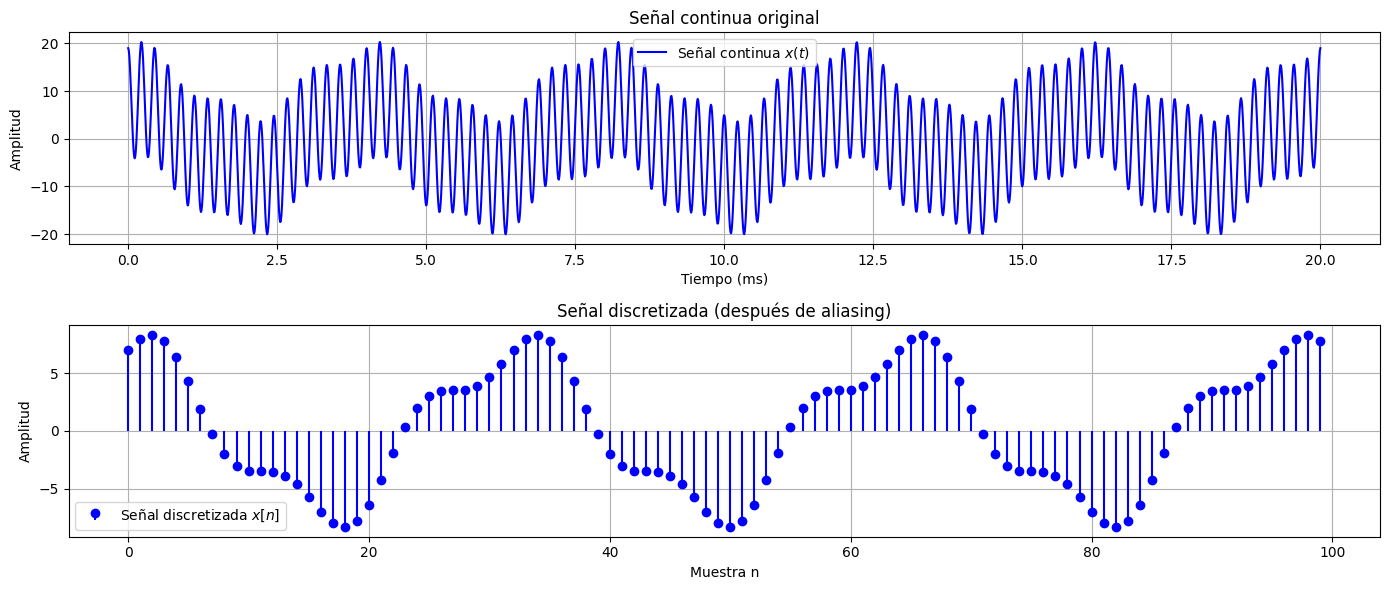

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 8000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.02, 2000)  # Tiempo continuo (20 ms)

# Frecuencias angulares continuas
w1 = 500 * np.pi
w2 = 1500 * np.pi
w3 = 9000 * np.pi

# Señal continua
x_t = 7 * np.cos(w1 * t) + 2 * np.sin(w2 * t) + 12 * np.cos(w3 * t)

# Señal discretizada
N = 100  # Número de muestras
n = np.arange(N)

# Frecuencias angulares normalizadas (Omega = w / Fs)
Omega1 = w1 / Fs
Omega2 = w2 / Fs
Omega3 = w3 / Fs

# Aliasing: llevar Omega3 al intervalo [-pi, pi]
if Omega3 > np.pi:
    Omega3_alias = Omega3 - 2*np.pi
else:
    Omega3_alias = Omega3

# Mostrar frecuencias normalizadas antes y después de aliasing
print(f"Ω1 = {Omega1:.2f} rad/muestra")
print(f"Ω2 = {Omega2:.2f} rad/muestra")
print(f"Ω3 antes de aliasing = {Omega3:.2f} rad/muestra")
print(f"Ω3 después de aliasing = {Omega3_alias:.2f} rad/muestra")

# Señal discretizada después de aliasing
x_n = (7) * np.cos(Omega1 * n) + 2 * np.sin(Omega2 * n)

# Graficar señal continua y discretizada
plt.figure(figsize=(14, 6))

# Señal continua
plt.subplot(2, 1, 1)
plt.plot(t*1000, x_t, label='Señal continua $x(t)$', color='blue')
plt.title('Señal continua original')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Señal discretizada
plt.subplot(2, 1, 2)
plt.stem(n, x_n, basefmt=" ", label='Señal discretizada $x[n]$', linefmt='blue', markerfmt='o')
plt.title('Señal discretizada (después de aliasing)')
plt.xlabel('Muestra n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()





# *Punto 3.*

In [16]:
import sympy as sp

# Definir las variables
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T
x1 = A * sp.cos(w0 * t)

# Tramos de x2(t)
x2_1 = 1
x2_2 = -1
x2_3 = 1

# Intervalos
I1 = sp.integrate((x1 - x2_1)**2, (t, 0, T/4))
I2 = sp.integrate((x1 - x2_2)**2, (t, T/4, 3*T/4))
I3 = sp.integrate((x1 - x2_3)**2, (t, 3*T/4, T))

# Sumar todo y dividir por T (potencia media)
distance = (I1 + I2 + I3) / T
distance.simplify()

A**2/2 - 4*A/pi + 1

# *Punto 4.*


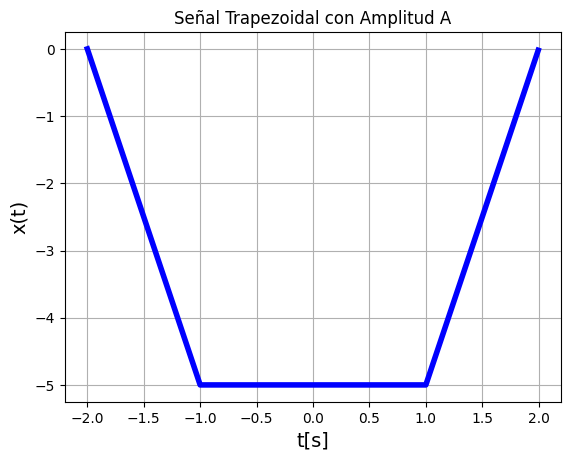

In [18]:
# Importación de librerías para gráficos y manipulación numérica
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para definir la escala y forma de la señal
A = 5        # Amplitud de la señal (modificado)
d2 = 2       # Extremo derecho del trapecio
d1 = 1       # Límite de la parte plana del trapecio

# Generar señal parametrizada en función del tiempo
T = 2 * d2       # Periodo total de la señal
Fo = 1 / T       # Frecuencia fundamental de la señal
Fs = 1000 * Fo   # Frecuencia de muestreo muy alta para buena resolución
tv = np.arange(-T / 2, T / 2, 1 / Fs) # Vector de tiempo para graficar la señal

# Definición de una función que genera una señal trapezoidal
def funcion_trapecio(x, a, b, c, d, amplitud):
    """
    Parámetros:
    x: vector de tiempo
    a: inicio de rampa ascendente
    b: inicio de la meseta
    c: final de la meseta
    d: final de rampa descendente
    amplitud: Amplitud máxima de la señal
    """
    y = np.zeros_like(x)
    # Rampa ascendente
    mask_asc = (x >= a) & (x < b)
    y[mask_asc] = amplitud * (x[mask_asc] - a) / (b - a)
    # Meseta
    mask_meseta = (x >= b) & (x <= c)
    y[mask_meseta] = amplitud
    # Rampa descendente
    mask_desc = (x > c) & (x <= d)
    y[mask_desc] = amplitud * (d - x[mask_desc]) / (d - c)
    return y

# Se genera la señal evaluando en el vector de tiempo y usando los puntos establecidos
# Se pasa A como amplitud y se usan -d2, -d1, d1, d2 como puntos clave
x = -funcion_trapecio(tv, -d2, -d1, d1, d2, A)

# Graficar señal original
plt.plot(tv, x, 'b', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Señal Trapezoidal con Amplitud A") # Título actualizado
plt.show()

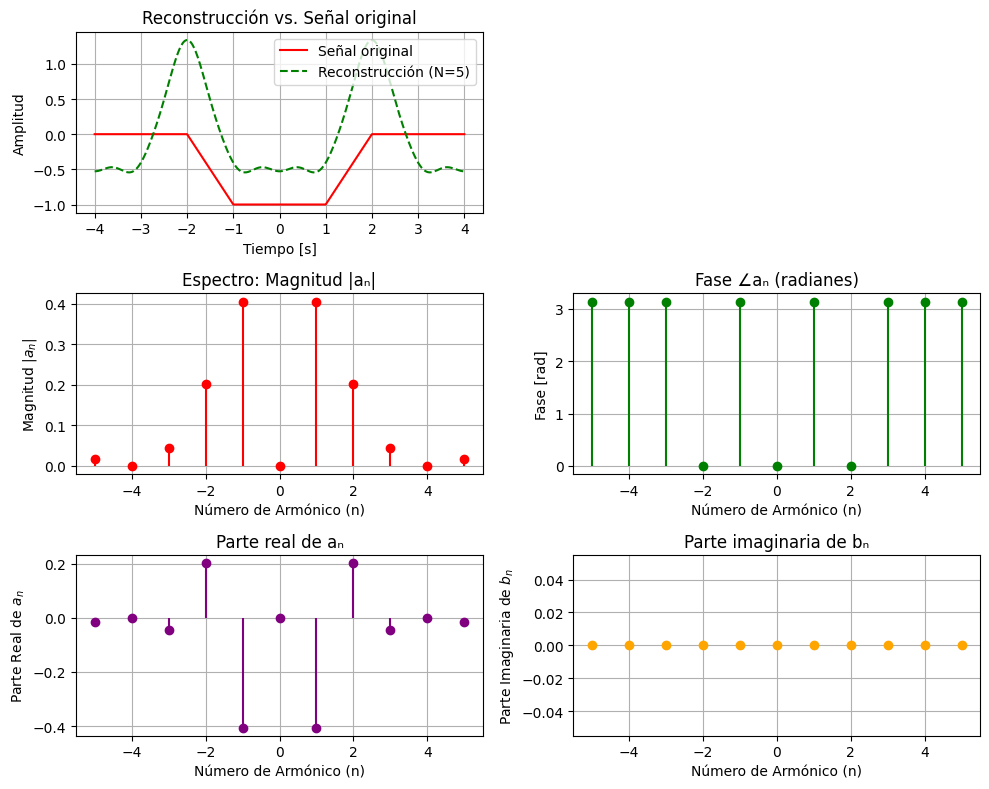

In [39]:
# Importación de librerías para gráficos y manipulación numérica
import numpy as np          # NumPy para operaciones numéricas y arrays
import matplotlib.pyplot as plt # Matplotlib para crear gráficos
import pandas as pd         # Pandas para manipulación de datos (aunque no se usa directamente aquí)

# Parámetros de la señal trapezoidal
A = 1                       # Amplitud de la señal
d1 = 1                      # Distancia del centro al inicio/fin de la meseta (parte plana)
d2 = 2                      # Distancia del centro al inicio/fin de la rampa (base del trapecio)
T = 2 * d2                  # Período fundamental de la señal trapezoidal
w0 = 2 * np.pi / T          # Frecuencia angular fundamental (rad/s)

# Coeficiente an (solo cosenos porque la señal es par)
# La función an(n) calcula el coeficiente a_n de la Serie de Fourier para un armónico 'n'.
# Como la señal es par, solo tenemos coeficientes cosenoidales (a_n), los b_n son cero.
def an(n):
    if n == 0:
        return 0 # Para n=0, el coeficiente a_0 (componente DC) es 0 para esta señal centrada.
    # Factor común en la fórmula de a_n para esta señal trapezoidal
    factor = -4 * A / (T * (n * w0)**2 * (d2 - d1))
    # Fórmula para a_n
    return factor * (np.cos(n * w0 * d1) - np.cos(n * w0 * d2))

# Señal original (exacta) por tramos
# Esta función define la señal trapezoidal exacta evaluada en un vector de tiempo 't'.
def x_exact(t):
    t = np.array(t) # Asegura que 't' sea un array de NumPy para operaciones elemento a elemento
    x = np.zeros_like(t) # Inicializa un array de ceros del mismo tamaño que 't'
    m = A / (d2 - d1) # Calcula la pendiente de las rampas del trapecio

    # Define la señal por tramos usando indexación booleana
    # Rampa izquierda: para t entre -d2 y -d1
    x += ((t > -d2) & (t < -d1)) * (-m * (t + d2))
    # Meseta: para t entre -d1 y d1
    x += ((t >= -d1) & (t <= d1)) * (-A)
    # Rampa derecha: para t entre d1 y d2
    x += ((t > d1) & (t < d2)) * (m * (t - d1) - A)

    return x # Retorna el array con los valores de la señal exacta

# Reconstrucción con serie de Fourier
N = 5 # Número de armónicos a incluir en la reconstrucción (desde -N hasta N)
# Vector de tiempo para graficar la señal reconstruida (desde -T hasta T)
t_vals = np.linspace(-T, T, 1000)
x_recon = np.zeros_like(t_vals) # Inicializa el array para la señal reconstruida

# Itera sobre los armónicos desde -N hasta N
for n in range(-N, N + 1):
    # Calcula el coeficiente a_n para el armónico actual 'n' (usando el valor absoluto de n)
    a_n = an(abs(n)) if n != 0 else 0
    # Suma la contribución del armónico actual a la señal reconstruida
    # Fórmula: a_n * cos(n * w0 * t)
    x_recon += a_n * np.cos(n * w0 * t_vals)

# Calcula los valores de la señal exacta en los mismos puntos de tiempo para comparar
x_true = x_exact(t_vals)

# Error relativo
error = np.abs(x_recon - x_true) # Calcula el error absoluto entre la reconstrucción y la señal exacta
# Calcula el error relativo (error absoluto dividido por el valor absoluto de la señal exacta)
# Se añade 1e-8 para evitar división por cero donde x_true es cero.
relative_error = error / (np.abs(x_true) + 1e-8)

# Espectro
# Calcula los valores necesarios para graficar el espectro (coeficientes, magnitud, fase)
n_vals = np.arange(-N, N + 1) # Array de los números de armónico (-N a N)
# Calcula los coeficientes a_n para cada armónico en n_vals
a_vals = np.array([an(abs(n)) if n != 0 else 0 for n in n_vals])
b_vals = np.zeros_like(a_vals) # Array de ceros para los coeficientes b_n (señal par)
mag_vals = np.abs(a_vals) # Magnitud de los coeficientes (para señales reales, es |a_n|)
phase_vals = np.angle(a_vals) # Fase de los coeficientes (en radianes)

# Gráficas
plt.figure(figsize=(10, 8)) # Aumentar ligeramente el tamaño de la figura para mejor visualización

# Subplot 1: Reconstrucción vs. Señal original
plt.subplot(3, 2, 1) # Define este como el primer subplot en una cuadrícula de 3x2
plt.plot(t_vals, x_true, label="Señal original", color='red') # Grafica la señal exacta en rojo
plt.plot(t_vals, x_recon, '--', label="Reconstrucción (N=5)", color='green') # Grafica la señal reconstruida en verde
plt.title("Reconstrucción vs. Señal original") # Título del subplot
plt.xlabel("Tiempo [s]") # Etiqueta del eje x
plt.ylabel("Amplitud") # Etiqueta del eje y
plt.legend() # Muestra la leyenda para identificar las líneas
plt.grid(True) # Muestra la cuadrícula



# Subplot 3: Espectro: Magnitud |aₙ|
plt.subplot(3, 2, 3) # Define este como el tercer subplot
plt.stem(n_vals, mag_vals, linefmt='red', markerfmt='o', basefmt=' ') # Grafica la magnitud en rojo
plt.title("Espectro: Magnitud |aₙ|") # Título del subplot
plt.xlabel("Número de Armónico (n)") # Etiqueta del eje x (número de armónico)
plt.ylabel("Magnitud $|a_n|$") # Etiqueta del eje y (magnitud)
plt.grid(True) # Muestra la cuadrícula

# Subplot 4: Fase ∠aₙ (radianes)
plt.subplot(3, 2, 4) # Define este como el cuarto subplot
plt.stem(n_vals, phase_vals, linefmt='green', markerfmt='o', basefmt=' ') # Grafica la fase en verde
plt.title("Fase ∠aₙ (radianes)") # Título del subplot
plt.xlabel("Número de Armónico (n)") # Etiqueta del eje x (número de armónico)
plt.ylabel("Fase [rad]") # Etiqueta del eje y (fase en radianes)
plt.grid(True) # Muestra la cuadrícula

# Subplot 5: Parte real de aₙ
plt.subplot(3, 2, 5) # Define este como el quinto subplot
plt.stem(n_vals, a_vals, linefmt='purple', markerfmt='o', basefmt=' ') # Grafica la parte real (ejemplo en morado)
plt.title("Parte real de aₙ") # Título del subplot
plt.xlabel("Número de Armónico (n)") # Etiqueta del eje x (número de armónico)
plt.ylabel("Parte Real de $a_n$") # Etiqueta del eje y (parte real)
plt.grid(True) # Muestra la cuadrícula

# Subplot 6: Parte imaginaria de bₙ
plt.subplot(3, 2, 6) # Define este como el sexto subplot
plt.stem(n_vals, b_vals, linefmt='orange', markerfmt='o', basefmt=' ') # Grafica la parte imaginaria (ejemplo en naranja)
plt.title("Parte imaginaria de bₙ") # Título del subplot
plt.xlabel("Número de Armónico (n)") # Etiqueta del eje x (número de armónico)
plt.ylabel("Parte Imaginaria de $b_n$") # Etiqueta del eje y (parte imaginaria)
plt.grid(True) # Muestra la cuadrícula

plt.tight_layout() # Ajusta automáticamente los parámetros de los subplots para evitar solapamientos
plt.show() # Muestra la figura con todos los subplots